FOR DIFFRACTION ; 

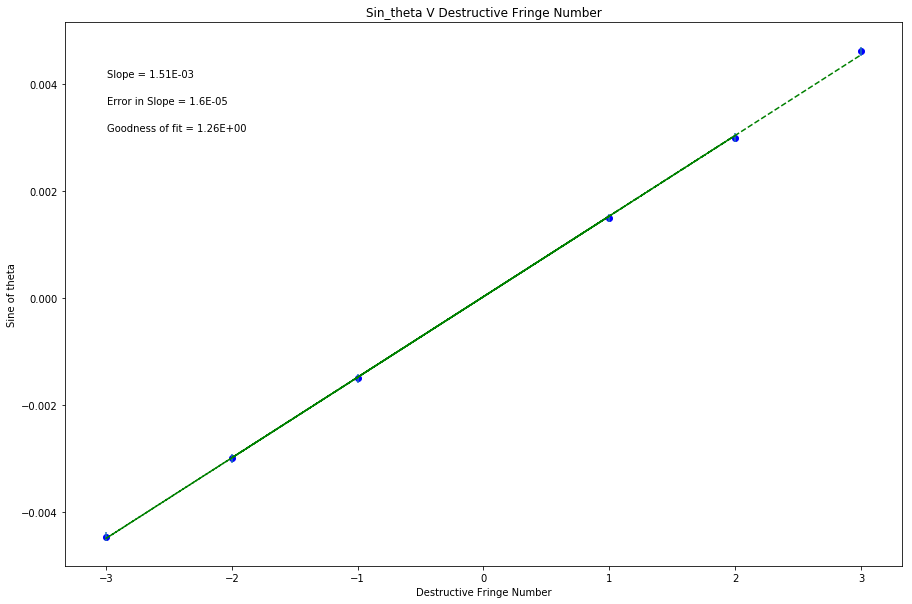

In [27]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
get_ipython().run_line_magic('matplotlib', 'inline')
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
sintheta = np.array([-0.001499, 0.001499, -0.002999, 0.002999, -.004466, .004617]) #no units 
p = np.array([-1,1,-2,2,-3,3]) #no units

#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
error_sintheta = np.array([8.342e-05, 8.342e-05, 8.390e-05, 8.390e-05, 8.464e-05, 8.475e-05])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = p   #this should be the array you want to plot on the x axis
y = sintheta
dy = error_sintheta  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Destructive Fringe Number')
plt.ylabel('Sine of theta')
plt.title('Sin_theta V Destructive Fringe Number')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()


In [8]:
#to find Lambda (wavelength of light)

wavelength = 0.0004*(.00151)*(1000000000)

print("Wavelength of Light =",wavelength,"nm")

Wavelength of Light = 604.0000000000001 nm


In [28]:
### Error of Lambda ###

def Qerror4(Q,Aerror4,A4,Berror4,B4,Cerror4,C4,m,n,o):
    qe4 = Q*(((((m*(Aerror4/A4))**2)+(n*(Berror4/B4))**2)+(o*(Cerror4/C4))**2)**(1/2))
    return qe4

Q =  6.04e-07 # lambda
A4 = 0.4e-03 #slit width
B4 = 1.51e-03 # #slope
C4 = .109 # not used today
Aerror4 = 0 # NO. error in slit width
Berror4 = 1.6e-05 # error in slope
Cerror4 = 0.00 # not used today
m = 1
n = 1
o = -1

Q_Error_4 = Qerror4(Q,Aerror4,A4,Berror4,B4,Cerror4,C4,m,n,o)
print("Error in Wavelength of Light = ",Q_Error_4,"m")

Error in Wavelength of Light =  6.3999999999999986e-09 m


FOR INTERFERENCE ; 

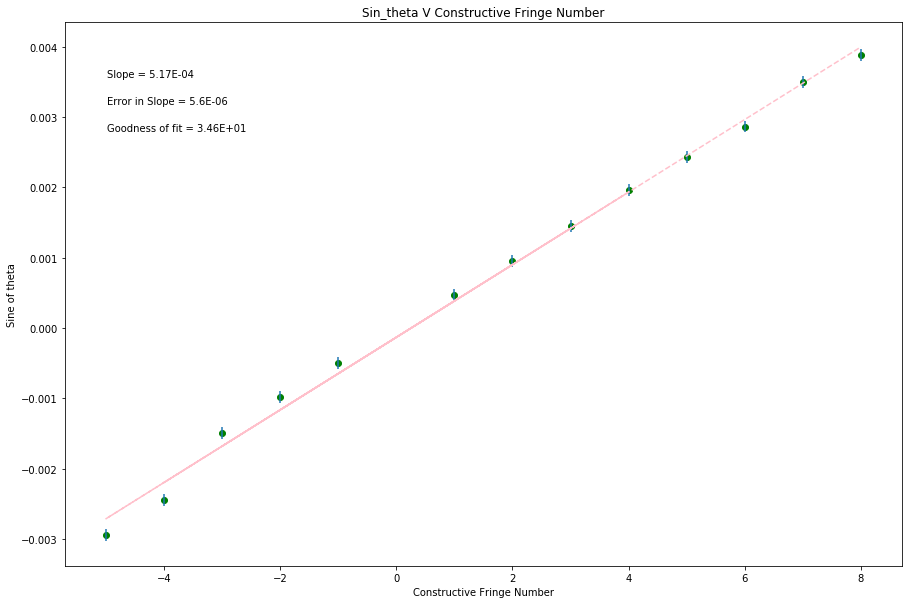

In [26]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


#Physics 216
#Plotting code to use the whole year!
#Jaylene Naylor
#September 2015, modified Sept 2017, August 2018
#-------------------------------------------#
get_ipython().run_line_magic('matplotlib', 'inline')
#Import packages and libraries needed and give them shortcut names
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt

#-------------------------------------------#
#Data Section - Create Arrays for data. Perform necessary calculations
#CHANGE THE VARIABLE NAMES and numbers to match your data
sintheta = np.array([-4.999e-04, 4.6666e-04, -9.833e-04, 9.499e-04, -0.001499, .001449, -0.002449, 0.001966, -0.002949, 0.002433, 0.002866, 0.003499, 0.003883]) #no units 
m = np.array([-1,1,-2,2,-3,3,-4,4,-5,5,6,7,8]) #no units

#--------------------------------------------#
#Create arrays for uncertainties
#CHANGE THE VARIABLE NAME and numbers to match your data 
error_sintheta = np.array([8.333e-05, 8.334e-05, 8.339e-05, 8.338e-05, 8.342e-05, 8.342e-05, 8.369e-05, 8.356e-05, 8.388e-05, 8.372e-05, 8.386e-05, 8.412e-05, 8.433e-05])


#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = m  #this should be the array you want to plot on the x axis
y = sintheta
dy = error_sintheta  #this should be your error in y array

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='pink', linestyle='--')
plt.scatter(x, y, color='green', marker='o')
 
 
#create labels  YOU NEED TO CHANGE THESE!!!
plt.xlabel('Constructive Fringe Number')
plt.ylabel('Sine of theta')
plt.title('Sin_theta V Constructive Fringe Number')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()



In [23]:
#to find Lambda (wavelength of light)

wavelength = (0.125e-03)*(5.17e-04)*(10e09)

print("Wavelength of Light =",wavelength,"nm")

Wavelength of Light = 646.25 nm


In [24]:
### Error of Lambda ###

def Qerror4(Q,Aerror4,A4,Berror4,B4,Cerror4,C4,m,n,o):
    qe4 = Q*(((((m*(Aerror4/A4))**2)+(n*(Berror4/B4))**2)+(o*(Cerror4/C4))**2)**(1/2))
    return qe4

Q =  6.4625e-07 # lambda
A4 = 0.4e-03 #slit width
B4 = 5.17e-04 # #slope
C4 = .109 # not used today
Aerror4 = 0 # NO. error in slit width
Berror4 = 5.6e-06 # error in slope
Cerror4 = 0.00 # not used today
m = 1
n = 1
o = -1

Q_Error_4 = Qerror4(Q,Aerror4,A4,Berror4,B4,Cerror4,C4,m,n,o)
print("Error in Wavelength of Light = ",Q_Error_4,"m")

Error in Wavelength of Light =  6.999999999999999e-09 m
